In [102]:
save_figures = True
save_tables = True


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout
from collections import Counter
import re


In [71]:
author_df = pd.read_csv('../datasets/twitter/tweets.csv', usecols=[
                        'author_id', 'description', 'username', 'name', 'created_at']).drop_duplicates()


In [59]:
full_string = " ".join(author_df['description'].str.lower())
full_string = re.sub(r'[^\w]', ' ', full_string)
words = Counter(full_string.split()).most_common(1000)


In [64]:
N = len(author_df)
df_common = pd.DataFrame(filter(lambda x: len(x[0]) > 5, words))
df_common.columns = ['word', 'appearance_rate']


In [118]:
table = df_common.head(50)
table.index += 1
if save_tables:
    original_stdout = stdout
    with open('../tables/common_words_desc.txt', 'w') as file:
        file.write(table.style.to_latex())
table


,word,appearance_rate
1,somalia,1333
2,somali,1126
3,social,961
4,account,816
5,official,803
6,activist,772
7,former,761
8,twitter,757
9,founder,726
10,director,683


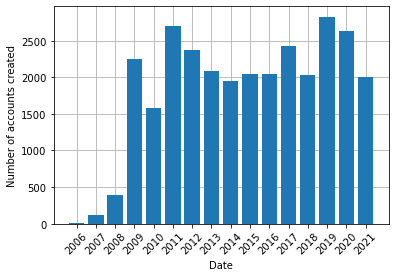

In [103]:
A = np.unique(author_df['created_at'].dt.year, return_counts=True)
fig, ax = plt.subplots()

ax.bar(x=A[0][:-1], height=A[1][:-1], zorder=1000)
ax.set_xticks(range(2006, 2022))
plt.xticks(rotation=45)
ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Number of accounts created')

if save_figures:
    fig.savefig('../figures/twitter_acccounts_created.pdf', format='pdf')
